<a href="https://colab.research.google.com/github/gotbutchi/Week5_ML_Tonga/blob/master/Week5_Project_Chau_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gather data

In [0]:
import pandas as pd 
import numpy as np

import random
import nltk
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import scipy.stats as stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [58]:
data = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review.csv', encoding='utf-8', sep='\t')
data.head()

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1




---



# Exploratory Data Analysis

Understanding the characteristics of our data beforehand will enable us to build a better model.
</br>
This could simply mean obtaining a higher accuracy.
</br>

*   Positive sentiment: 1
*   Negative sentiment: 0




## Cleaning the data

We want to drop the column id since it does not provide useful information to our task.

In [59]:
data.drop(columns = "id", inplace = True)
data

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
22495,It seems like more consideration has gone into...,0
22496,I don't believe they made this film. Completel...,0
22497,"Guy is a loser. Can't get girls, needs to buil...",0
22498,This 30 minute documentary BuÃ±uel made in the...,0




---



## Collect some key metrics for our data

This will help characterize our text classification problem.

*Hypothesis before analyzing*: Normally when people have something good to say, its more compact then when they are distressed so maybe the length of comments does matter?

Using group by feature, we can begin to think about the features that separate positive and negative!

In [60]:
data.groupby('sentiment').describe()

review                                                               
           count unique                                                top freq
sentiment                                                                      
0          11222  11170  When i got this movie free from my job, along ...    3
1          11278  11255  it's amazing that so many people that i know h...    2

We can check whether our dataset is balanced and the class is equally distributed.

In [61]:
# number of samples per class
data['sentiment'].value_counts()

1    11278
0    11222
Name: sentiment, dtype: int64

Our dataset is not really balanced because of the number of samples per class is not equal.

---
To explore other potential features related to text classification, we want to make a column to detect how long the reviews are.

In [62]:
data['length'] = data['review'].apply(len)
data

,review,sentiment,length
0,With all this stuff going down at the moment w...,1,2302
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,946
2,The film starts with a manager (Nicholas Bell)...,0,2455
3,It must be assumed that those who praised this...,0,2245
4,Superbly trashy and wondrously unpretentious 8...,1,2233
...,...,...,...
22495,It seems like more consideration has gone into...,0,580
22496,I don't believe they made this film. Completel...,0,975
22497,"Guy is a loser. Can't get girls, needs to buil...",0,641
22498,This 30 minute documentary BuÃ±uel made in the...,0,1145


---
We might want to get the number of words per review as well.

In [0]:
# Get total number of words
def word_count(review):
  num_words = [len(s.split()) for s in review]
  return np.sum(num_words)

In [0]:
# Explore the median number of words per review
def avg_word_count(review):
  avg_no_words = [len(s.split()) for s in review]
  return np.median(avg_no_words)

In [0]:
data['word count'] = data['review'].apply(word_count)

In [66]:
data

,review,sentiment,length,word count
0,With all this stuff going down at the moment w...,1,2302,1870
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,946,789
2,The film starts with a manager (Nicholas Bell)...,0,2455,2078
3,It must be assumed that those who praised this...,0,2245,1867
4,Superbly trashy and wondrously unpretentious 8...,1,2233,1867
...,...,...,...,...
22495,It seems like more consideration has gone into...,0,580,486
22496,I don't believe they made this film. Completel...,0,975,802
22497,"Guy is a loser. Can't get girls, needs to buil...",0,641,515
22498,This 30 minute documentary BuÃ±uel made in the...,0,1145,949


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      22500 non-null  object
 1   sentiment   22500 non-null  int64 
 2   length      22500 non-null  int64 
 3   word count  22500 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 703.2+ KB


In [68]:
data.describe()

,sentiment,length,word count
count,22500.000000,22500.000000,22500.000000
mean,0.501244,1327.851689,1095.062978
std,0.500010,1006.448556,833.267120
min,0.000000,52.000000,43.000000
25%,0.000000,703.000000,577.000000
50%,1.000000,981.000000,808.000000
75%,1.000000,1613.250000,1331.250000
max,1.000000,13708.000000,11239.000000




---

## Data Visualization

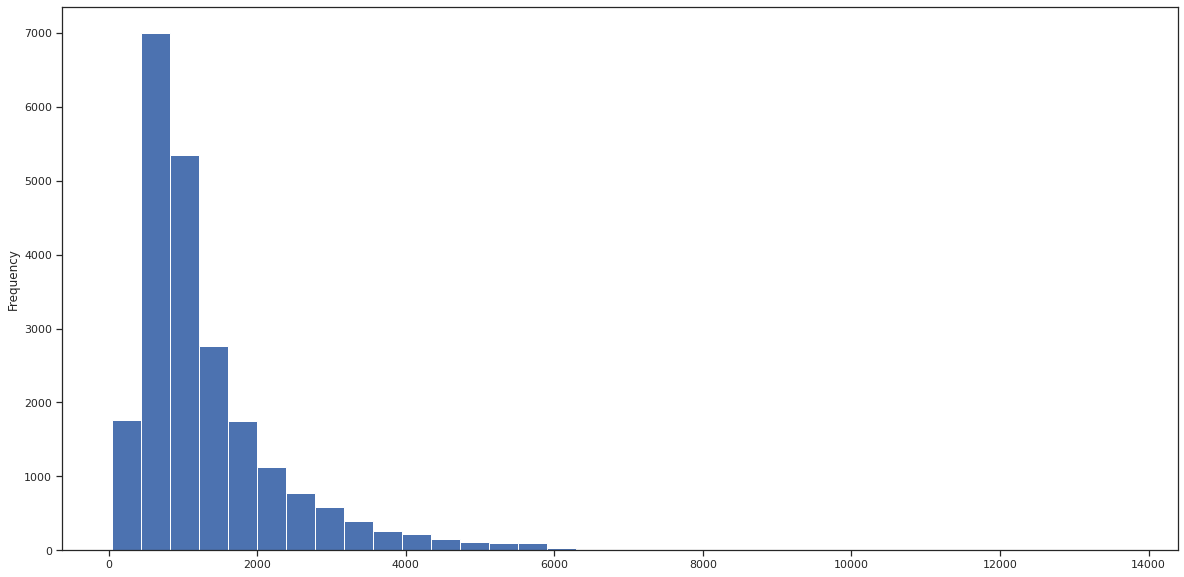

In [69]:
data['length'].plot.hist(bins=35)

Looks like text length may be a good feature to think about! 
Let's try to explain why the x-axis goes all the way to 14000ish, this must mean that there is some really long reviews!

In [70]:
data['length'].describe()

count    22500.000000
mean      1327.851689
std       1006.448556
min         52.000000
25%        703.000000
50%        981.000000
75%       1613.250000
max      13708.000000
Name: length, dtype: float64

The longest review has 13708 characters! We will use masking to find this review.

In [71]:
data[data['length'] == 13708]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [72]:
# Check the sentiment of the longest review
data[data['length'] == 13708]['sentiment'].iloc[0]

1

In [73]:
data['word count'].describe()

count    22500.000000
mean      1095.062978
std        833.267120
min         43.000000
25%        577.000000
50%        808.000000
75%       1331.250000
max      11239.000000
Name: word count, dtype: float64

In [74]:
data[data['word count'] == 11239]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

Looks like this is from a WWE TV Show feature the match between The Undertaker vs. The Rock vs. Kurt Angle (for more information: https://www.imdb.com/title/tt0316873/).

This also matches the review with the most number of words.
</br>
We can see that this review is a positive one. 

Let's focus back on the idea of trying to see if message length is a distinguishing feature between positive and negative sentiment.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74154b07f0>,
      dtype=object)

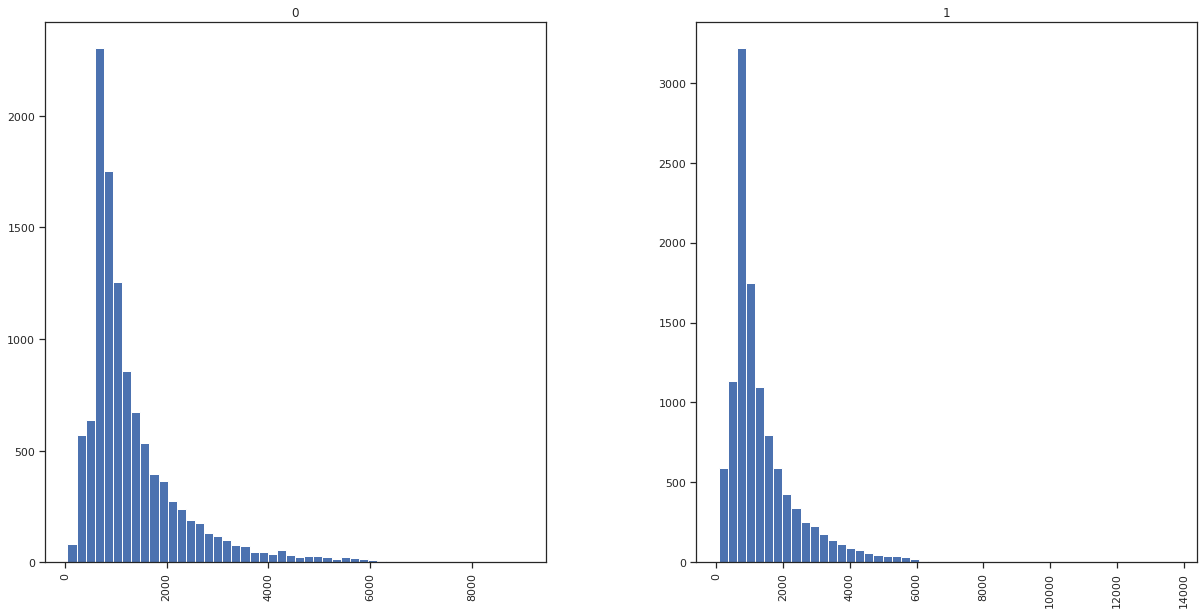

In [75]:
data.hist(column='length', by='sentiment', bins=50)

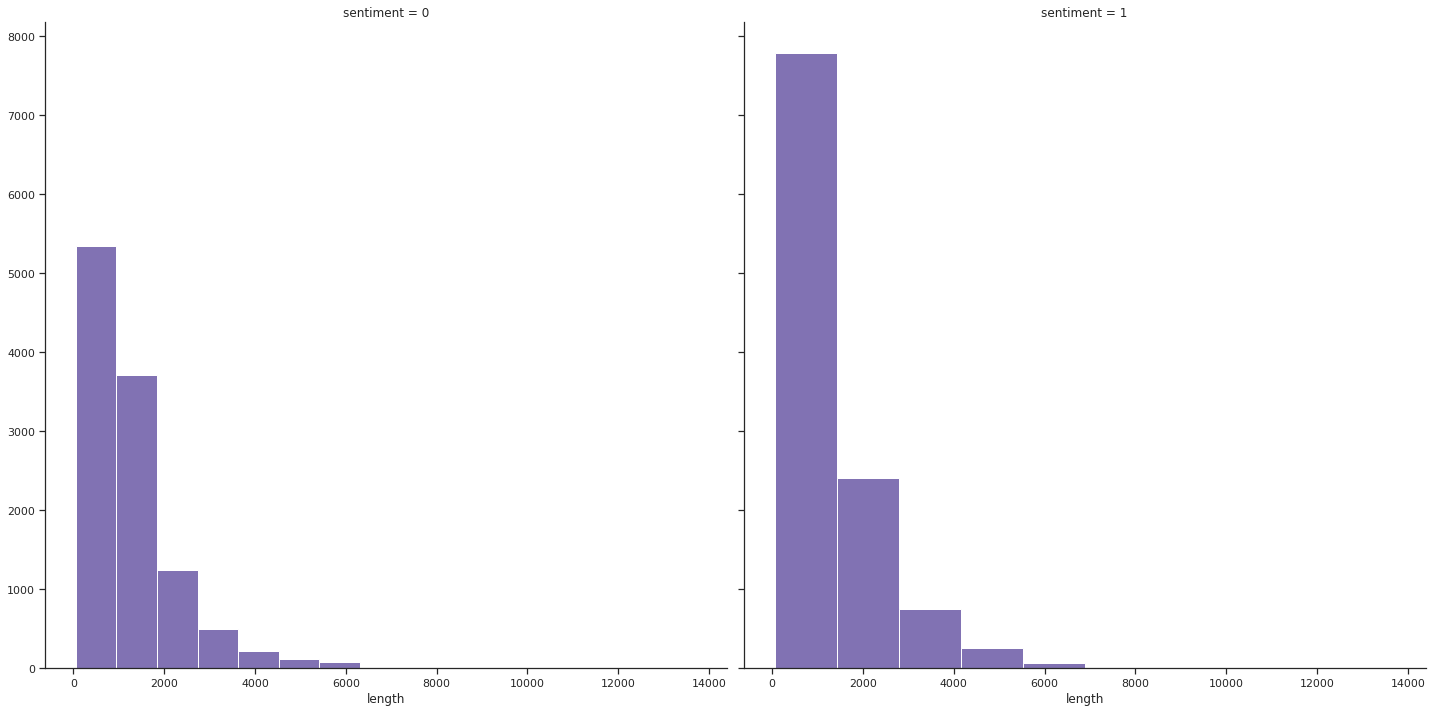

In [76]:
# text length based off of the review sentiment
g = sns.FacetGrid(data,col='sentiment', height=10, aspect=1)
g.map(plt.hist,'length', color="m")

Interesting! Through just basic EDA we've been able to discover a trend that positive messages tend to have more characters.

---



# Text Pre-Processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers) in 2 steps:

1. Tokenization: Divide the texts into words or smaller sub-texts, which will enable good generalization of relationship between the texts and the labels. This determines the “vocabulary” of the dataset (set of unique tokens present in the data).

2. Vectorization: Define a good numerical measure to characterize these texts.



---

## NLTK (Natural Language Toolkit)


In [77]:
import nltk 
nltk.download('stopwords')
from nltk import stem, WordNetLemmatizer
from nltk.corpus import stopwords 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Clean up  text data

In [0]:
#function to split text by '<br /><br />' and join separated sentences back
def split_and_join(column):
  cleaned_review = [''.join(column[i].split('<br /><br />')) for i in range(len(column))]
  return cleaned_review

In [79]:
data['cleaned review'] = split_and_join(data['review'])
data

,review,sentiment,length,word count,cleaned review
0,With all this stuff going down at the moment w...,1,2302,1870,With all this stuff going down at the moment w...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,946,789,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,The film starts with a manager (Nicholas Bell)...,0,2455,2078,The film starts with a manager (Nicholas Bell)...
3,It must be assumed that those who praised this...,0,2245,1867,It must be assumed that those who praised this...
4,Superbly trashy and wondrously unpretentious 8...,1,2233,1867,Superbly trashy and wondrously unpretentious 8...
...,...,...,...,...,...
22495,It seems like more consideration has gone into...,0,580,486,It seems like more consideration has gone into...
22496,I don't believe they made this film. Completel...,0,975,802,I don't believe they made this film. Completel...
22497,"Guy is a loser. Can't get girls, needs to buil...",0,641,515,"Guy is a loser. Can't get girls, needs to buil..."
22498,This 30 minute documentary BuÃ±uel made in the...,0,1145,949,This 30 minute documentary BuÃ±uel made in the...




---



### Text Normalization

Our document is prepared through tokenization, removal of stop words and then Stemming and Lemmatization to reduce the number of tokens that carry out the same information and hence speed up the whole process.

1. Case Normalization
2. Removing Stop Words
3. Removing Punctuations or Special Symbols
4. Lemmatization or Stemming
5. Parts of Speech Tagging
6. Entity Detection

In [80]:
# Create another dataframe for model 1
data1 = data[['cleaned review','sentiment', 'length', 'word count']]
data1

,cleaned review,sentiment,length,word count
0,With all this stuff going down at the moment w...,1,2302,1870
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,946,789
2,The film starts with a manager (Nicholas Bell)...,0,2455,2078
3,It must be assumed that those who praised this...,0,2245,1867
4,Superbly trashy and wondrously unpretentious 8...,1,2233,1867
...,...,...,...,...
22495,It seems like more consideration has gone into...,0,580,486
22496,I don't believe they made this film. Completel...,0,975,802
22497,"Guy is a loser. Can't get girls, needs to buil...",0,641,515
22498,This 30 minute documentary BuÃ±uel made in the...,0,1145,949




---



#### Tokenizing

In [0]:
# import re
# # split the sentence into a list of words
# def tokenize(text):
#     tokens = re.split('\W+',text.lower())
#     return tokens
# print(tokenize(data1['cleaned review'][1]))

#### Stemming
Cut the end of the words to remove the surfixes.

In [0]:
# def Porterstemming(text): 
#     stemmer = stem.PorterStemmer()
#     return ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

In [0]:
# text = 'profiling profile appreciating appreciate'
# print(Porterstemming(text))

In [0]:
# data1['cleaned review'][1]

In [0]:
# Porterstemming(data1['cleaned review'][1])



---



#### Lemmatizing

In [0]:
# def lemmatizing(text):
#   lemmatizer = WordNetLemmatizer()
#   return ''.join([lemmatizer.lemmatize(word) for word in text])

In [0]:
# data1['cleaned review'][1]

In [0]:
# lemmatizing(data1['cleaned review'][0])



---



### Stopwords and punctuation

Remove all the words that are not meaningful/informative.

Steps: 

1.   Split into tokens.

2.   Convert to lowercase.

3.   Remove punctuation from each token.

4.   Filter out remaining tokens that are not alphabetic.

5.   Filter out tokens that are stop words.





---



#### Detects negations and transforms negated words into 'not_' form

#### Stopwords and punctuations

In [0]:
# # get stopwords
# stop_words = set(stopwords.words('english'))
# def demon_stopwords(text):
#     clean_text= ' '.join(word for word in text.split() if word not in stop_words)
#     return clean_text

In [0]:
# demon_stopwords(data1['cleaned review'][1])

In [0]:
# import string
# punct = string.punctuation
# def remove_punctuation(text):
#     new_text=''.join([char for char in text if char not in punct])
#     return new_text

In [0]:
# def preprocessor(text):
#     """ Return a cleaned version of text
#     """
#     # Remove HTML markup and digits
#     text = re.sub('<[^>]*>', '', str(text))
#     text = re.sub('_|\d+', '', str(text))
#     # Save emoticons for later appending
#     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
#     # Remove any non-word character and append the emoticons,
#     # removing the noise character for standarization. Convert to lower case
#     text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
#     # remove stopwords
#     clean_text= ' '.join(word for word in text.split() if word not in stop_words)

#     return clean_text

In [0]:
# (data1['cleaned review'][1])

In [0]:
# preprocessor(data1['cleaned review'][1])



---



#### Wrapping up

Finally, we want to visualize our text pre-processing process.

In [0]:
import re
import string
punct = string.punctuation
stop_words = set(stopwords.words('english'))

def tokenize(text):
    tokens=re.split('\W+',text.lower())
    return tokens

def Porterstemming(text): 
    stemmer = stem.PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split() if word.lower() not in stop_words])

def lemmatizing(text):
  lemmatizer = WordNetLemmatizer()
  return ''.join([lemmatizer.lemmatize(word) for word in text])

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup and digits
    text = re.sub('<[^>]*>', '', str(text))
    text = re.sub('_|\d+', '', str(text))
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the noise character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    # remove stopwords
    clean_text= ' '.join(word for word in text.split() if word not in stop_words)

    return clean_text
    
nltk_data = data1.copy()
nltk_data['tokenize'] = nltk_data['cleaned review'].apply(tokenize)
nltk_data['stemming'] = nltk_data['cleaned review'].apply(Porterstemming)
nltk_data['lemmatizing'] = nltk_data['stemming'].apply(lemmatizing)
nltk_data['remove_punc_stop'] = nltk_data['lemmatizing'].apply(preprocessor)

In [96]:
docs = 'alo 123 ::)) why did i spent so much time for this regex... *crying in a corner* ____________omg__________'
preprocessor(docs)

'alo spent much time regex crying corner omg :)'

In [97]:
nltk_data

,cleaned review,sentiment,length,word count,tokenize,stemming,lemmatizing,remove_punc_stop
0,With all this stuff going down at the moment w...,1,2302,1870,"[with, all, this, stuff, going, down, at, the,...","stuff go moment MJ i'v start listen music, wat...","stuff go moment MJ i'v start listen music, wat...",stuff go moment mj v start listen music watch ...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,946,789,"[, the, classic, war, of, the, worlds, by, tim...","\the classic war worlds\"" timothi hine enterta...","\the classic war worlds\"" timothi hine enterta...",classic war worlds timothi hine entertain film...
2,The film starts with a manager (Nicholas Bell)...,0,2455,2078,"[the, film, starts, with, a, manager, nicholas...",film start manag (nichola bell) give welcom in...,film start manag (nichola bell) give welcom in...,film start manag nichola bell give welcom inve...
3,It must be assumed that those who praised this...,0,2245,1867,"[it, must, be, assumed, that, those, who, prai...",must assum prais film (\the greatest film oper...,must assum prais film (\the greatest film oper...,must assum prais film greatest film opera ever...
4,Superbly trashy and wondrously unpretentious 8...,1,2233,1867,"[superbly, trashy, and, wondrously, unpretenti...",superbl trashi wondrous unpretenti 80' exploit...,superbl trashi wondrous unpretenti 80' exploit...,superbl trashi wondrous unpretenti exploitatio...
...,...,...,...,...,...,...,...,...
22495,It seems like more consideration has gone into...,0,580,486,"[it, seems, like, more, consideration, has, go...",seem like consider gone imdb review film went ...,seem like consider gone imdb review film went ...,seem like consider gone imdb review film went ...
22496,I don't believe they made this film. Completel...,0,975,802,"[i, don, t, believe, they, made, this, film, c...",believ made film. complet unnecessary. first f...,believ made film. complet unnecessary. first f...,believ made film complet unnecessary first fil...
22497,"Guy is a loser. Can't get girls, needs to buil...",0,641,515,"[guy, is, a, loser, can, t, get, girls, needs,...","guy loser. can't get girls, need build up, pic...","guy loser. can't get girls, need build up, pic...",guy loser get girls need build pick stronger s...
22498,This 30 minute documentary BuÃ±uel made in the...,0,1145,949,"[this, 30, minute, documentary, buã, uel, made...",30 minut documentari buã±uel made earli 1930' ...,30 minut documentari buã±uel made earli 1930' ...,minut documentari buã uel made earli one spain...


In [98]:
nltk_data['remove_punc_stop'][1]

'classic war worlds timothi hine entertain film obvious goe great effort length faith recreat h g wells classic book mr hine succe watch film appreci fact standard predict hollywood fare come everi year e g spielberg version tom cruis slightest resembl book obviously everyon look differ thing movie envis amateur critics look critic everyth rate movi import bases lik entertained peopl never agre critics enjoy effort mr hine put faith h g wells classic novel found entertaining made easi overlook critics perceiv shortcomings'

In [0]:
nltk_data = nltk_data[['sentiment', 'remove_punc_stop']]

In [100]:
nltk_data

,sentiment,remove_punc_stop
0,1,stuff go moment mj v start listen music watch ...
1,1,classic war worlds timothi hine entertain film...
2,0,film start manag nichola bell give welcom inve...
3,0,must assum prais film greatest film opera ever...
4,1,superbl trashi wondrous unpretenti exploitatio...
...,...,...
22495,0,seem like consider gone imdb review film went ...
22496,0,believ made film complet unnecessary first fil...
22497,0,guy loser get girls need build pick stronger s...
22498,0,minut documentari buã uel made earli one spain...


# Preparing our data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
nltk_data

,sentiment,remove_punc_stop
0,1,stuff go moment mj v start listen music watch ...
1,1,classic war worlds timothi hine entertain film...
2,0,film start manag nichola bell give welcom inve...
3,0,must assum prais film greatest film opera ever...
4,1,superbl trashi wondrous unpretenti exploitatio...
...,...,...
22495,0,seem like consider gone imdb review film went ...
22496,0,believ made film complet unnecessary first fil...
22497,0,guy loser get girls need build pick stronger s...
22498,0,minut documentari buã uel made earli one spain...


In [0]:
#train_test_split for nltk processed data
# X_nltk_train, X_nltk_test, y_nltk_train, y_nltk_test = train_test_split(nltk_data['remove_punc_stop'], nltk_data['sentiment'], stratify = nltk_data['sentiment'], test_size = 0.2, random_state = 1)

In [50]:
# df_nltk_ytrain = pd.DataFrame(y_nltk_train)
# df_nltk_ytest = pd.DataFrame(y_nltk_test)
# print(df_nltk_ytrain['sentiment'].value_counts())
# print(df_nltk_ytest['sentiment'].value_counts())

1    9022
0    8978
Name: sentiment, dtype: int64
1    2256
0    2244
Name: sentiment, dtype: int64


In [0]:
X_train = nltk_data['remove_punc_stop']
y_train = nltk_data['sentiment']

In [0]:
df = pd.read_csv('/content/testing.csv')
X_test = df['review']
y_test = df['sentiment']

In [103]:
df

,Unnamed: 0,sentiment,review
0,0,0,It must be assumed that those who praised this...
1,1,1,Superbly trashy and wondrously unpretentious 8...
2,2,1,I dont know why people think this is such a ba...
3,3,0,"This movie could have been very good, but come..."
4,4,0,I watched this video at a friend's house. I'm ...
...,...,...,...
992,992,0,The only thing I remember about this movie are...
993,993,1,This is a kind of movie that will stay with yo...
994,994,0,I just didn't get this movie...Was it a musica...
995,995,0,Granting the budget and time constraints of se...




---



### Vectorization
Transform text data to numbers so that computer can understand

1. Bag of Words
2. TF-IDF

We will only focus on Tf-idf.

#### TF-IDF

In [0]:
# Import tfidf method 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

stop = stopwords.words('english')

def tokenizer_porter(text):
    porter = PorterStemmer()
    return [porter.stem(word) for word in text.split()]

# def tokenizer_porter_lemma(text):
#     stemmer = stem.PorterStemmer()
#     stemmed = ' '.join([stemmer.stem(word) for word in text.split() if word.lower() not in stop_words])
#     lemmatizer = WordNetLemmatizer()
#     return [lemmatizer.lemmatize(word) for word in stemmed]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup and digits
    text = re.sub('<[^>]*>', '', str(text))
    text = re.sub('_|\d+', '', str(text))
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the noise character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    # remove stopwords
    clean_text= ' '.join(word for word in text.split() if word not in stop_words)

    return clean_text

# assign the tfidf method to a variable 
tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

# Formatting the number to 2 digits after the decimal point by showing on this notebook
np.set_printoptions(precision=2)

In [0]:
# X_train_tfidf = tfidf.fit_transform(X_nltk_train)

In [0]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [53]:
tfidf.get_feature_names()

[':(',
 ':)',
 ':D',
 ';)',
 ';D',
 '=(',
 '=)',
 '=D',
 '=P',
 'aa',
 'aaa',
 'aaaaaaah',
 'aaaaah',
 'aaaahhhhhhh',
 'aaaand',
 'aaaarrgh',
 'aaah',
 'aaargh',
 'aaaugh',
 'aaawwwwnnn',
 'aada',
 'aag',
 'aaghh',
 'aah',
 'aahhh',
 'aaip',
 'aaja',
 'aakash',
 'aakrosh',
 'aaliyah',
 'aam',
 'aamir',
 'aankh',
 'aankhen',
 'aap',
 'aapk',
 'aardman',
 'aardvark',
 'aargh',
 'aaron',
 'aarp',
 'aatish',
 'aauugghh',
 'aavjo',
 'aaww',
 'ab',
 'aback',
 'abahi',
 'abanaz',
 'abandon',
 'abandoningindian',
 'abandonof',
 'abank',
 'abash',
 'abashidz',
 'abat',
 'abattoir',
 'abba',
 'abbad',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abbrevi',
 'abc',
 'abcd',
 'abdic',
 'abdomen',
 'abdu',
 'abduct',
 'abductor',
 'abdullah',
 'abe',
 'abel',
 'abercrombi',
 'aberr',
 'aberystwyth',
 'abet',
 'abgail',
 'abhay',
 'abhi',
 'abhijeet',
 'abhisheh',
 'abhishek',
 'abhor',
 'abhorr',
 'abi',
 'abid',
 'abigail',
 'abigil',
 'abil',
 'abishai',
 'abject',
 'abjectli',
 'abkani',
 'abl',
 'a

In [0]:
#visualize our data after transform --> do it if you want to crash the server again...
# tfidf_data = pd.DataFrame(X_train_tfidf.toarray())
# tfidf_data.head()



---



# Build our model of nltk-preprossed data

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Logistic Regression

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

### TD-IDF performance

In [109]:
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])

clf.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f7403295048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f74032950d0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
         

#### Evaluate our model

In [110]:
predictions1 = clf.predict(X_test)
accuracy_score(y_test, predictions1)

0.9047141424272819

In [112]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       517
           1       0.88      0.92      0.90       480

    accuracy                           0.90       997
   macro avg       0.90      0.91      0.90       997
weighted avg       0.91      0.90      0.90       997



In [150]:
confusion_matrix(y_test, predictions1)

array([[459,  58],
       [ 37, 443]])

In [149]:
print("Mean Squared Error: %f" % mean_squared_error(y_test, predictions1))
print("Accuracy Score: %f" % accuracy_score(y_test, predictions1))


Mean Squared Error: 0.095286
Accuracy Score: 0.904714




---



## Naive Bayes classifier

### TD-IDF performance

In [117]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB()
mnb = Pipeline([('tfidf', tfidf), ('clf', clf2)])

mnb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f7403295048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself',...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                

In [114]:
predictions2 = mnb.predict(X_test)
accuracy_score(y_test, predictions2)

0.8986960882647944

In [115]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       517
           1       0.89      0.91      0.90       480

    accuracy                           0.90       997
   macro avg       0.90      0.90      0.90       997
weighted avg       0.90      0.90      0.90       997



In [0]:
print("Mean Squared Error: %f" % mean_squared_error(y_test, predictions2))
print("Accuracy Score: %f" % accuracy_score(y_test, predictions2))



---



## Randomforest

### TD-IDF performance

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators= 1200, random_state=42)
rfc = Pipeline([('tfidf', tfidf), ('clf', clf3)])

rfc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f7403295048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself',...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                            

In [119]:
predictions3 = rfc.predict(X_test)
accuracy_score(y_test, predictions3)

0.9869608826479438

In [0]:
# #trial 1 with n_estimator = 20
# predictions3 = rfc.predict(X_test)
# accuracy_score(y_test, predictions3)

0.8004444444444444

In [0]:
# #trial with all default param
# predictions3 = rfc.predict(X_nltk_test)
# accuracy_score(y_nltk_test, predictions3)

0.8504444444444444

In [120]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       517
           1       0.98      1.00      0.99       480

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997



In [151]:
confusion_matrix(y_test, predictions3)

array([[506,  11],
       [  2, 478]])

In [122]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: %f" % mean_squared_error(y_test, predictions3))
print("Accuracy Score: %f" % accuracy_score(y_test, predictions3))

Mean Squared Error: 0.013039
Accuracy Score: 0.986961


### Test on evaluation data set

In [0]:
import pandas as pd
moment_of_truth = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', encoding='utf-8', sep='\t')

In [139]:
moment_of_truth

,id,review
0,10633_1,I watched this video at a friend's house. I'm ...
1,4489_1,`The Matrix' was an exciting summer blockbuste...
2,3304_10,This movie is one among the very few Indian mo...
3,3350_3,The script for this movie was probably found i...
4,1119_1,Even if this film was allegedly a joke in resp...
...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ..."
2496,7261_3,This British-Spanish co-production is one of t...
2497,11075_10,"Having read the reviews for this film, I under..."
2498,2041_2,Well I'll start with the good points. The movi...


In [147]:
review

["I watched this video at a friend's house. I'm glad I did not waste money buying this one. The video cover has a scene from the 1975 movie Capricorn One. The movie starts out with several clips of rocket blow-ups, most not related to manned flight. Sibrel's smoking gun is a short video clip of the astronauts preparing a video broadcast. He edits in his own voice-over instead of letting us listen to what the crew had to say. The video curiously ends with a showing of the Zapruder film. His claims about radiation, shielding, star photography, and others lead me to believe is he extremely ignorant or has some sort of ax to grind against NASA, the astronauts, or American in general. His science is bad, and so is this video.",
 "`The Matrix' was an exciting summer blockbuster that was visually fantastic but also curiously thought provoking in its `Twilight Zone'-ish manner. The general rule applies here- and this sequel doesn't match up to its predecessor. Worse than that, it doesn't even 

In [0]:
review = moment_of_truth['review'].tolist()

In [0]:
# a function to print out the prediction
def pred(review):
    chau = []
    for text in review:
      prediction = clf.predict([text])
      chau.append(prediction[0])
    return chau

In [148]:
pred(review)

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [0]:
moment_of_truth['fingercrossed'] = pred(review)

In [0]:
moment_of_truth.to_csv('Chau.csv')



---

